A basic practice of TIme Series Forecasting using Air Passengers data set. 
Source of data set: https://www.kaggle.com/rakannimer/air-passengers

In [2]:
#importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#reading the dataset
data = pd.read_csv("AirPassengers.csv")
print(data.head())
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
Month          object
#Passengers     int64
dtype: object


In [9]:
#converting data as index
from datetime import datetime
con = data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
#checking data between some intervals
ts['1949-05-01':'1950-01-01']

Month
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
Name: #Passengers, dtype: int64

In [19]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

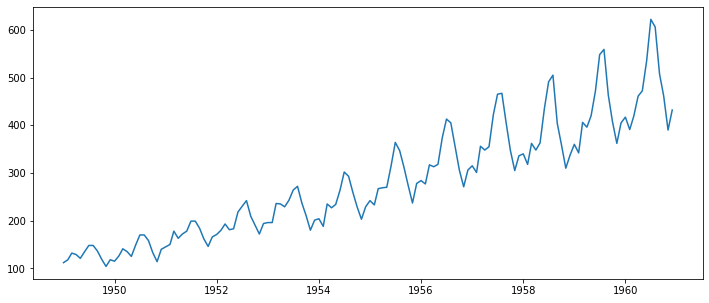

In [25]:
plt.figure(figsize=(12,5))
plt.plot(ts)

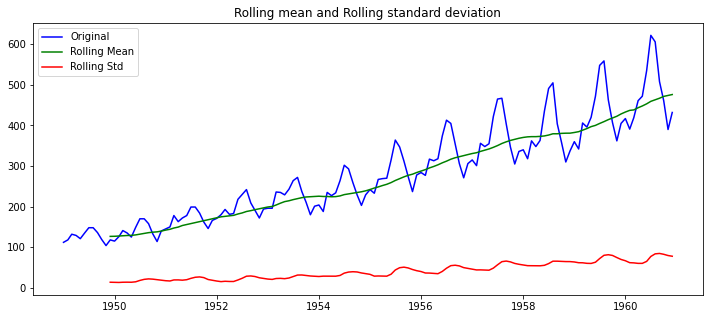

Dickey-Fuller Test Results:
Test Statistic               0.815369
p-value                      0.991880
Lags Used                   13.000000
no.of observations used    130.000000
Critical value(1%)          -3.481682
Critical value(5%)          -2.884042
Critical value(10%)         -2.578770
dtype: float64


In [65]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    
    plt.figure(figsize=(12,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Rolling standard deviation")
    plt.show()
    print("Dickey-Fuller Test Results:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                            'p-value', 'Lags Used', 
                                            'no.of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)
test_stationary(ts)

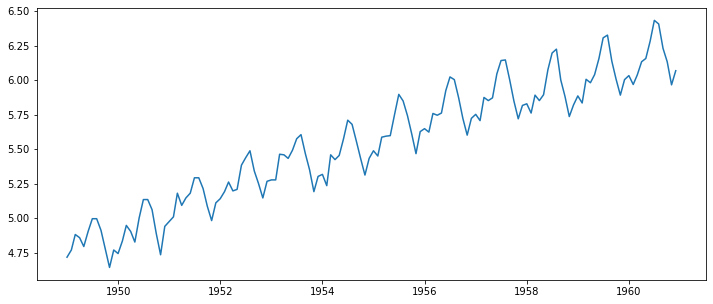

In [46]:
#reducing the trend using logarithimic transformation
ts_log = np.log(ts)
plt.figure(figsize=(12,5))
plt.plot(ts_log)

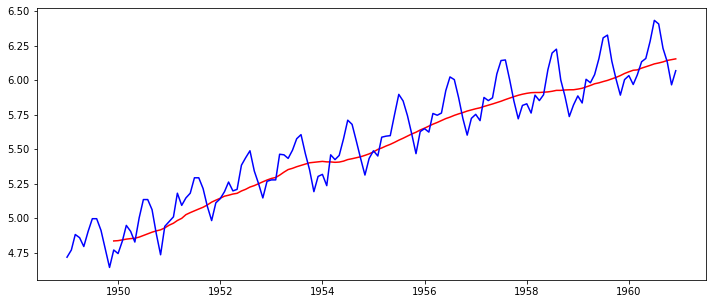

In [54]:
#comparision between logarithimic transformation and moving avg of it
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(12,5))
plt.plot(moving_avg, color='red')
plt.plot(ts_log, color='blue')

In [53]:
#diff between logarithimic transformation and its moving avg
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [59]:
#dropping null values from above
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

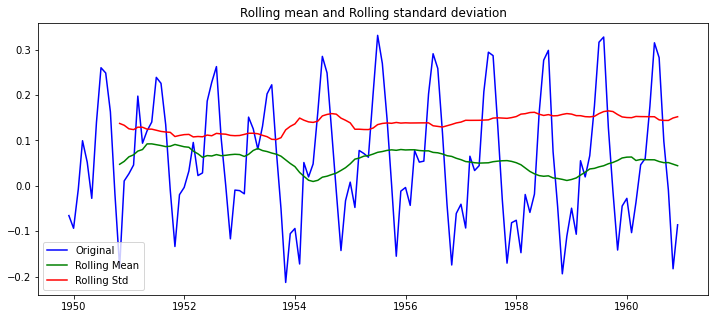

Dickey-Fuller Test Results:
Test Statistic              -3.162908
p-value                      0.022235
Lags Used                   13.000000
no.of observations used    119.000000
Critical value(1%)          -3.486535
Critical value(5%)          -2.886151
Critical value(10%)         -2.579896
dtype: float64


In [64]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    rolmean = ts_log_moving_avg_diff.rolling(12).mean()
    rolstd = ts_log_moving_avg_diff.rolling(12).std()
    
    plt.figure(figsize=(12,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Rolling standard deviation")
    plt.show()
    print("Dickey-Fuller Test Results:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                            'p-value', 'Lags Used', 
                                            'no.of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)
test_stationary(ts_log_moving_avg_diff)

slight variations between rolling mean and standard deviations but no specific trend observed.
And Test Statistic 

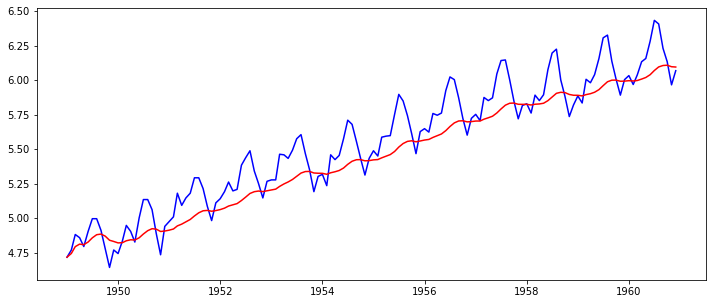

In [70]:
#exponentially weighted moving average 
ewma = ts_log.ewm(12).mean()
plt.figure(figsize=(12,5))
plt.plot(ts_log, color='blue')
plt.plot(ewma, color='red')

In [72]:
ts_log_ewma_diff = ts_log - ewma
ts_log_ewma_diff.head()

Month
1949-01-01    0.000000
1949-02-01    0.025049
1949-03-01    0.087740
1949-04-01    0.046571
1949-05-01   -0.013381
Name: #Passengers, dtype: float64

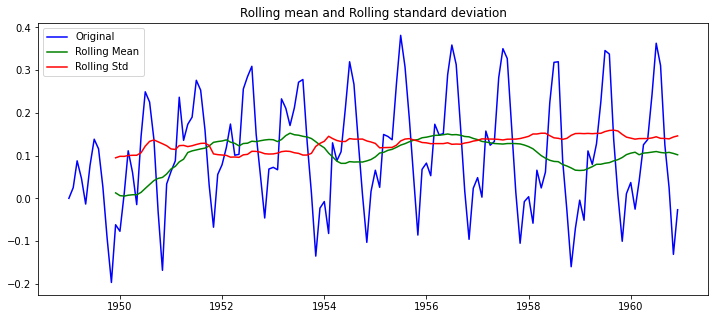

Dickey-Fuller Test Results:
Test Statistic              -3.566092
p-value                      0.006443
Lags Used                   13.000000
no.of observations used    130.000000
Critical value(1%)          -3.481682
Critical value(5%)          -2.884042
Critical value(10%)         -2.578770
dtype: float64


In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    rolmean = ts_log_ewma_diff.rolling(12).mean()
    rolstd = ts_log_ewma_diff.rolling(12).std()
    
    plt.figure(figsize=(12,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Rolling standard deviation")
    plt.show()
    print("Dickey-Fuller Test Results:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                            'p-value', 'Lags Used', 
                                            'no.of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)
test_stationary(ts_log_ewma_diff)